In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data',names=['buying','maint','doors','persons','lug_boot','safety','class'])

In [3]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying      1728 non-null object
maint       1728 non-null object
doors       1728 non-null object
persons     1728 non-null object
lug_boot    1728 non-null object
safety      1728 non-null object
class       1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB


In [5]:
df.isnull().values.any()

False

In [6]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,high,high,3,more,small,high,unacc
freq,432,432,432,576,576,576,1210


In [7]:
#all are category
df['buying'],uniq = pd.factorize(df['buying'])
df['maint'],uniq = pd.factorize(df['maint'])
df['doors'],uniq = pd.factorize(df['doors'])
df['persons'],uniq = pd.factorize(df['persons'])
df['lug_boot'],uniq = pd.factorize(df['lug_boot'])
df['safety'],uniq = pd.factorize(df['safety'])

In [8]:
df['class'],uniq_class=pd.factorize(df['class'])

In [9]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,2,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,1,0


In [10]:
df['class'].value_counts()

0    1210
1     384
3      69
2      65
Name: class, dtype: int64

In [11]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from time import time
from operator import itemgetter

In [13]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=1234,stratify=y)

In [14]:
def GridSearch_BestParam(X, y, clf, param_grid,cv=10):
    grid_search = GridSearchCV(clf,
                              param_grid=param_grid,
                              cv=cv)
    start= time()
    grid_search.fit(X,y)
    top_params=grid_search.best_params_
    return top_params

In [15]:
y_test.value_counts()

0    363
1    115
3     21
2     20
Name: class, dtype: int64

In [16]:
param_grid_dt={'criterion':['gini','entropy'],
              'min_samples_split':[5,10,20,30,40],
              'max_depth':[2,3,5,7,9,15,20],
              'min_samples_leaf':[1,5,10,20,25,30]}

In [17]:
model_dt=DecisionTreeClassifier()

In [18]:
top_para=GridSearch_BestParam(X_train,y_train,model_dt,param_grid_dt,cv=10)

In [19]:
print(top_para)

{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [20]:
best_dt=DecisionTreeClassifier(criterion='entropy',max_depth=15,min_samples_leaf=1,min_samples_split=5)

In [21]:
best_dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [22]:
best_dt.score(X_train,y_train)

0.9909015715467329

In [23]:
y_pred = best_dt.predict(X_test)

In [24]:
from sklearn import metrics

In [25]:
print(metrics.accuracy_score(y_test,y_pred))

0.9595375722543352


In [26]:
(y_test != y_pred).sum()

21

In [27]:
uniq_class

Index(['unacc', 'acc', 'vgood', 'good'], dtype='object')

In [28]:
import graphviz
from sklearn import tree
feature_names = X.columns

dot_data = tree.export_graphviz(best_dt, out_file=None, filled=True, rounded=True,
                                feature_names=feature_names,class_names=uniq_class)
graph = graphviz.Source(dot_data)  

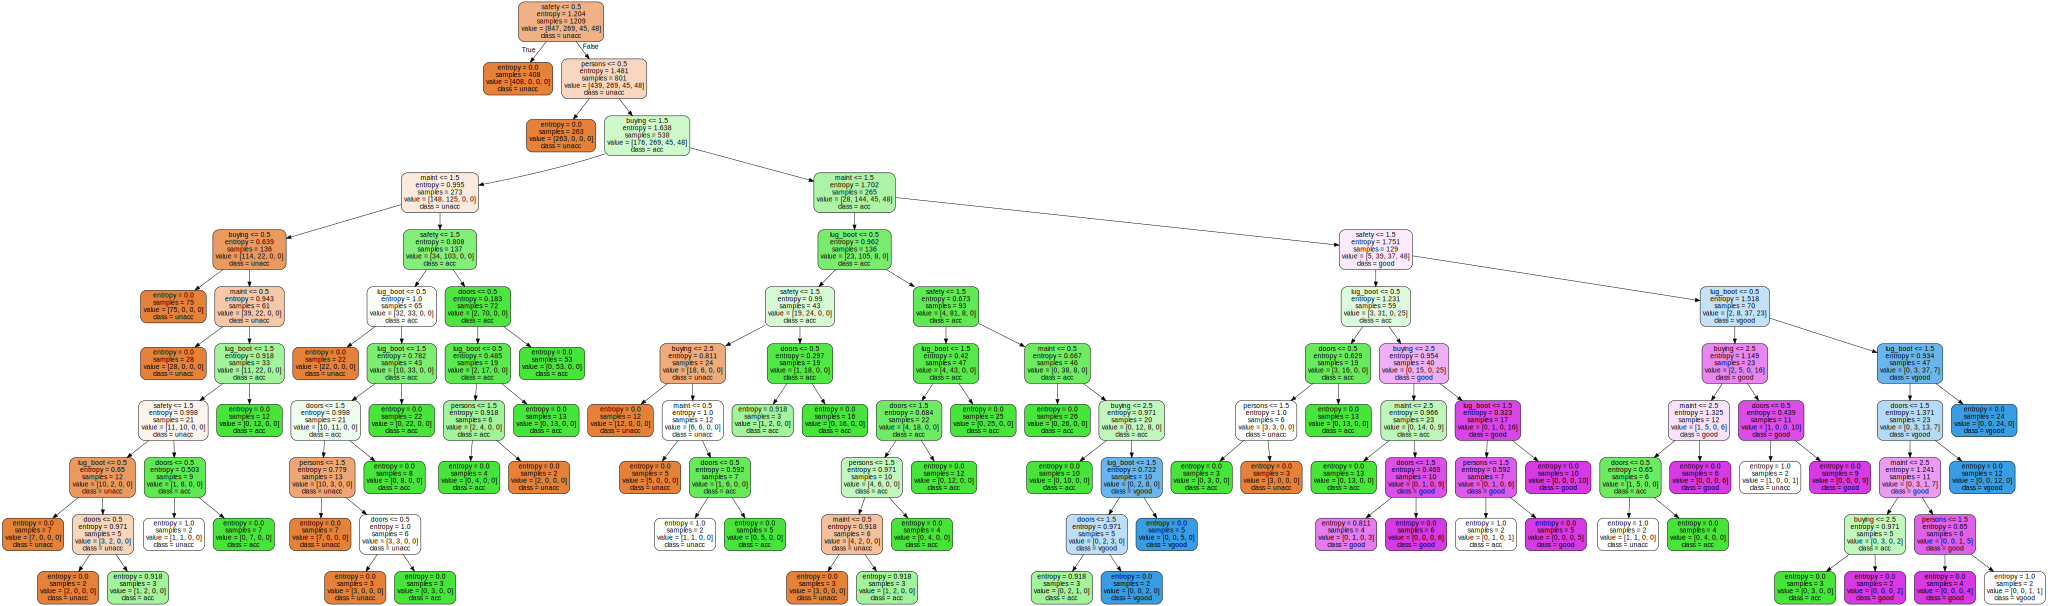

In [29]:
graph